In [1]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import load_img, ImageDataGenerator
import os
import scipy

C:\Users\LG\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## **Train / Validation / Test**

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory('last_img_data/train/', target_size = (216,556), batch_size=9, class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory('last_img_data/validation/', target_size = (216,556), batch_size=4, class_mode='categorical')

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory('last_img_data/test/', target_size = (216,556), batch_size=4, class_mode='categorical')

Found 4794 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.


In [3]:
from keras import layers
from keras import models 

#model.add(layers.ZeroPadding2D(padding=(1, 1)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.BatchNormalization(momentum=0.99, epsilon=0.001)
#model.add(layers.Dropout(0.5))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='softmax'))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [51]:
# 음악을 시간 순으로 인식하니 1D convolution model으로 시도
def build_model_2():
    model = models.Sequential()
    ##
    #model.add(layers.Input((556,216,3)))
    #model.add(layers.ZeroPadding2D(padding=((2, 2), (0, 0))))
    model.add(layers.Conv2D(64, (72, 3),strides=(16, 1), activation='relu', input_shape=(216, 556, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    ##
    model.add(layers.Conv2D(128, (5, 3), activation='relu'))
    ##
    model.add(layers.ZeroPadding2D(padding=((0, 0), (1, 1))))#height/wide
    model.add(layers.Conv2D(128, (1, 5), activation='relu'))
    model.add(layers.MaxPooling2D((1, 3)))
    ##
    model.add(layers.ZeroPadding2D(padding=((0, 0), (1, 2))))
    model.add(layers.Conv2D(512, (1, 5), activation='relu'))
    model.add(layers.MaxPooling2D((1, 3)))
    ##
    #model.add(layers.Flatten())
    model.add(layers.Conv1D(3000, 3, strides=1, padding='valid',activation='relu')
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dense(500, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [52]:
model=build_model_2()

In [53]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 10, 554, 64)       41536     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 277, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 1, 275, 128)       123008    
_________________________________________________________________
zero_padding2d_16 (ZeroPaddi (None, 1, 277, 128)       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 1, 273, 128)       82048     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 91, 128)        0         
_________________________________________________________________
zero_padding2d_17 (ZeroPaddi (None, 1, 94, 128)        0         
__________

In [54]:
import keras.backend.tensorflow_backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

history = model.fit_generator(train_generator, steps_per_epoch=1024, epochs=30, callbacks = [EarlyStopping(patience=5)], validation_data=validation_generator, validation_steps=512)

Epoch 1/30
1024/1024 [==============================] - 2850s 3s/step - loss: 2.0806 - acc: 0.1242 - val_loss: 2.0795 - val_acc: 0.1250
Epoch 2/30
1024/1024 [==============================] - 2582s 3s/step - loss: 2.0799 - acc: 0.1204 - val_loss: 2.0795 - val_acc: 0.1250
Epoch 3/30
1024/1024 [==============================] - 2494s 2s/step - loss: 2.0798 - acc: 0.1143 - val_loss: 2.0795 - val_acc: 0.1250
Epoch 4/30
1024/1024 [==============================] - 2169s 2s/step - loss: 2.0798 - acc: 0.1144 - val_loss: 2.0795 - val_acc: 0.1250
Epoch 5/30
1024/1024 [==============================] - 2079s 2s/step - loss: 2.0798 - acc: 0.1192 - val_loss: 2.0795 - val_acc: 0.1250
Epoch 6/30
1024/1024 [==============================] - 2054s 2s/step - loss: 2.0799 - acc: 0.1136 - val_loss: 2.0795 - val_acc: 0.1250


In [55]:
model.save_weights('model_weights_2.h5')

In [56]:
scores = model.evaluate_generator(test_generator, steps=400)

In [57]:
scores

[2.079478496313095, 0.125]

Text(0.5,0.98,'Loss and Accuracy')

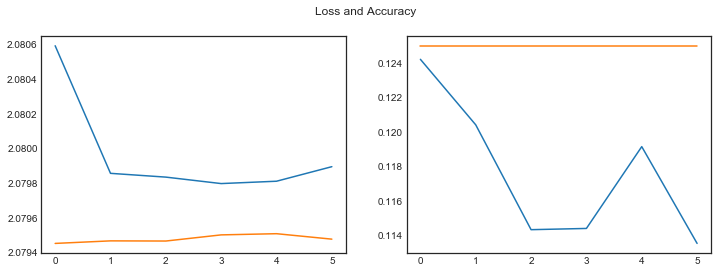

In [78]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

fig, (ax_loss, ax_acc) = plt.subplots(1, 2, figsize=(12,4))
ax_loss.plot(history.epoch, history.history["loss"], label="Train loss")
ax_loss.plot(history.epoch, history.history["val_loss"], label="Validation loss")

ax_acc.plot(history.epoch, history.history["acc"], label="Train accuracy")
ax_acc.plot(history.epoch, history.history["val_acc"], label="Validation accuracy")

plt.suptitle("Loss and Accuracy")